# Homework 2: Multiple Linear Regression (50 points)

**Reading**: Data8 textbook chapters [15](https://www.inferentialthinking.com/chapters/15/Prediction) and  [16](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.


Homework 2 is due on Friday April 15, 2022 at 6:00pm. 

In [209]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Birth Weight (50 points) ##

The data below contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.


This dataset was used last quarter, but the only question investigated there was on the association of maternal smoking with birth weight. Here we will try to provide a better understanding of the factors that influence birth weight.

**The variable of interest is Birth Weight.**

In [210]:
# this commands loads the data into a data frame
baby_df=pd.read_csv("baby.csv")
baby_df.head(10)

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
5,138,244,33,62,178,False
6,132,245,23,65,140,False
7,120,289,25,62,125,False
8,143,299,30,66,136,True
9,140,351,27,68,120,False


#### Question 1 ( Visualization, 10 points)

Draw scatter plots of Birth Weight (on the y-axis) versus the four quantitative variables. Also construct a graph that shows the relation between Birth Weight and Maternal Smoker (Hint: boxplots, histograms, or violin plots).  
Why do Maternal Height and Maternal age have stripes but gestational days and pregnancy weight do not?

Text(0.5, 1.0, 'Gestational Days vs. Birth Weight')

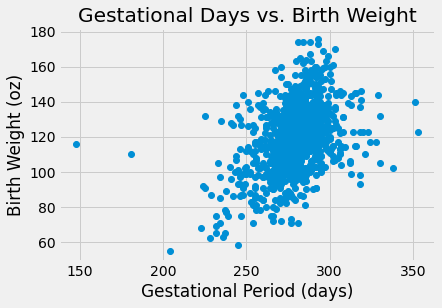

In [211]:
# Making 4 scatter plots (Gestational Days vs. Birth Weight)
plt.plot(baby_df["Gestational Days"], baby_df["Birth Weight"], "o")
plt.xlabel("Gestational Period (days)")
plt.ylabel("Birth Weight (oz)")
plt.title("Gestational Days vs. Birth Weight")

Text(0.5, 1.0, 'Maternal Age vs. Birth Weight')

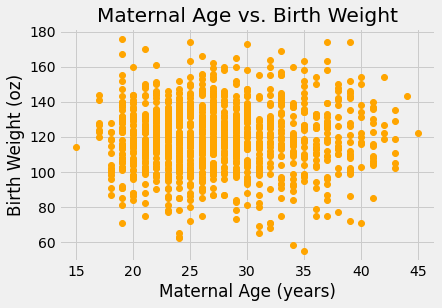

In [212]:
# Making 4 scatter plots (Maternal Age vs. Birth Weight)
plt.plot(baby_df["Maternal Age"], baby_df["Birth Weight"], "o", color = "orange")
plt.xlabel("Maternal Age (years)")
plt.ylabel("Birth Weight (oz)")
plt.title("Maternal Age vs. Birth Weight")

# When you see vertical plots, you can tell that the x values is much more 
#discrete compared to the y values. In other words, Maternal Age has a much lower range of
#values in years compared to the range of values in Birth Weight in oz. 

Text(0.5, 1.0, 'Maternal Height vs. Birth Weight')

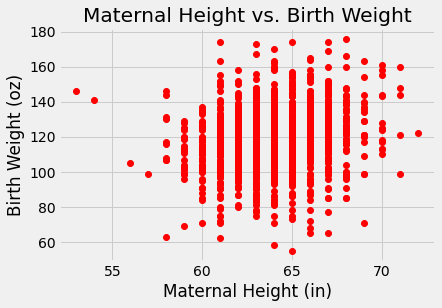

In [213]:
# Making 4 scatter plots
plt.plot(baby_df["Maternal Height"], baby_df["Birth Weight"], "o", color = "red")
plt.xlabel("Maternal Height (in)")
plt.ylabel("Birth Weight (oz)")
plt.title("Maternal Height vs. Birth Weight")

# Similar to the plot of Maternal Age vs. Birth Weight when you see vertical plots 
#you can tell that the x values are much more discrete compared to the y values. 
# In other words, Maternal Height has a much lower range of values in years compared to 
#the range of values in Birth Weight in oz.

Text(0.5, 1.0, 'Maternal Pregnancy Weight vs. Birth Weight')

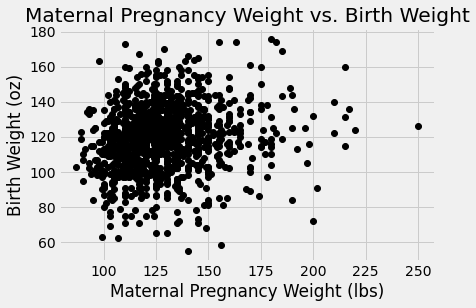

In [214]:
# Making 4 scatter plots
plt.plot(baby_df["Maternal Pregnancy Weight"], baby_df["Birth Weight"], "o", color = "black")
plt.xlabel("Maternal Pregnancy Weight (lbs)")
plt.ylabel("Birth Weight (oz)")
plt.title("Maternal Pregnancy Weight vs. Birth Weight")

In [215]:
# How to access specific rows with boolean values with 2 columns

baby_df.loc[baby_df["Maternal Smoker"] == True,["Birth Weight"]]
# 2 different syntaxes in accessing columns below:
# df.columnname
# df['']

,Birth Weight
2,128
3,108
8,143
10,144
11,141
...,...
1162,143
1163,113
1164,109
1165,103


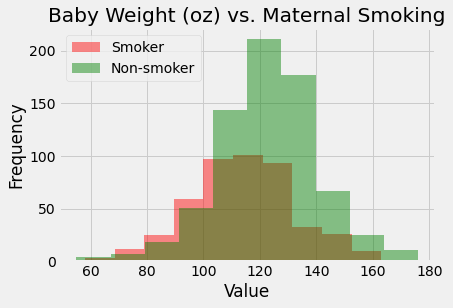

In [216]:
# Making histogram for baby weight vs. maternal smoking

# Setting up 2 variables and plotting 2 histograms
smoke_df = baby_df.loc[baby_df["Maternal Smoker"] == True,["Birth Weight"]]
nonsmoke_df = baby_df.loc[baby_df["Maternal Smoker"] == False,["Birth Weight"]]
plt.hist(smoke_df["Birth Weight"], color="red", label="Smoker", alpha=0.45)
plt.hist(nonsmoke_df["Birth Weight"], label="Non-smoker", color = "green", alpha=0.45)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Baby Weight (oz) vs. Maternal Smoking")
plt.legend() # Corresponds to the argument "label" within hist function, no need to pass any
            #new arguments within legend function

**For Questions 2-6, you should write your own code (it is fine to copy functions that we wrote for the class/lecture notebooks); do not use existing regression functions in Python libraries. (Optimization or linear algebra solvers are ok.)  All relevant code is in class notebooks.**

#### Question 2 (Simple Linear Regression, Gestational Age, 5 points)

Fit a simple linear regression model for `Gestational Days` (as the predictor) and `Birth Weight` (as the response). Calculate the intercept, the slope and a 95% Confidence Interval for the slope. Briefly discuss your results by: (i) interpreting the slope; (ii) discussing the signficance of the predictor (is there evidence that the slope is different than 0?); (iii) commenting on whether the results make sense (does it make sense for birth weight to be associated with gestational age?).



Slope of regression line: 0.467
Approximate 95%-confidence interval for the slope of the true line:
0.385 to 0.554


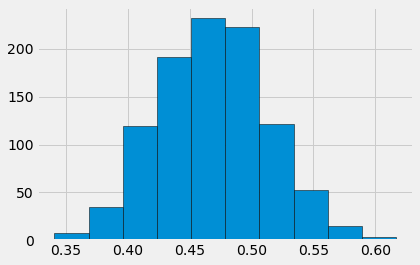

In [184]:
# code here and in additional cells if needed
# See more detailed explanation of bootstrapping in Data 8 textbook

# function that finds covariance
def covariance(x, y):
    """Calculates the covariance given x and y values"""
    cova = np.sum((y-np.mean(y))*(x-np.mean(x)))/len(x)
    return cova

# function that calculates correlation between 2 different arrays(?)
# includes std units function!!!!!
def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

# function to find regression coefficients m and b
def reg_coeff(x, y):
    """Calculates m (b1) and b (b0) to perform least-squares regression"""
    m = covariance(x,y)/np.var(x)
    b = np.mean(y)-(m*np.mean(x))
    return m, b

# this is a function that outputs a 95% CI for the slope
# input is a data frame, the name of the two columns, and number of bootstraps

def bootstrap_slope(df, x, y, repetitions):
    """Calculates a 95% CI for the slope of a dataframe
    arguments are data frame (df), the name of the two columns (x, y), 
    and number of bootstraps (repititions)"""
    # the number of observations
    n=df.shape[0]
    # Bootstrap the scatter, find the slope, collect
    slopes = np.array([])
    for i in np.arange(repetitions):
        bootstrap_sample = df.sample(n,replace=True)
        bootstrap_slope = reg_coeff(bootstrap_sample[x], bootstrap_sample[y])
        slopes = np.append(slopes, bootstrap_slope[0])
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = np.percentile(slopes,2.5)
    right = np.percentile(slopes,97.5)
    
    # Slope of the regression line from the original sample
    observed_slope = reg_coeff(df[x],df[y])
    # print(observed_slope[0])
    
    # Display results
    print('Slope of regression line:', round(observed_slope[0],3))
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(round(left,3), 'to', round(right,3))
    plt.hist(slopes, edgecolor = "black")
    # plt.plot(np.sort(slopes))
#     plt.scatter(bootstrap_sample[x], bootstrap_sample[y])
#     print(bootstrap_slope)

# Calculating 95% CI of the slope of the true line
bootstrap_slope(baby_df, "Gestational Days", "Birth Weight", 1000)




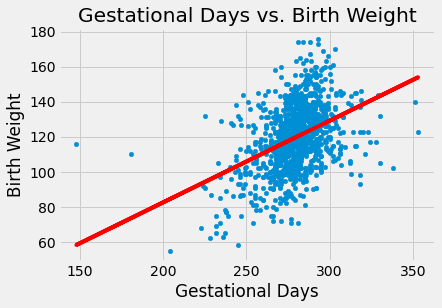

In [75]:
# Calling regression coefficients, m and b, for gestational days and birth weight
reg_gest_lbs = reg_coeff(baby_df["Gestational Days"], baby_df["Birth Weight"])
reg_gest_lbs

# Plotting gestational days vs. birth weight
baby_df.plot("Gestational Days", "Birth Weight", kind = "scatter")

# Adding fitted line to scatter plot of gestational days vs. birth weight
x = baby_df["Gestational Days"]
y = baby_df["Birth Weight"]
plt.plot(x, reg_gest_lbs[0]*x + reg_gest_lbs[1], color = "red")

# Labels
plt.xlabel("Gestational Days")
plt.ylabel("Birth Weight")
plt.title("Gestational Days vs. Birth Weight")
plt.show()

In [217]:
# i.) Interpreting the slope of the linear regression. The slope has a positive correlation.
# This makes sense given the intuiton that the longer a child is in the womb of their mother
#the larger their birth weight will be because they took more time to develop. The slope was
#calculated to be 0.467.

# ii.) Looking at the real data, gestational days appears to have a much larger significance
#in its affect on birth weight because of how steep the data points are in the scatter plot.
# However, the linear regression model does not reflect this beause of the outliers in this
#data. If we were to remove those outliers, perhaps the linear regression model will have a
#better fit with the true data points and have a higher correlation.

# iii.) Again, it makes sense that birth weight is associated with how far along a pregnancy
#is. It make logical sense that the baby was able to have more time to develop in the womb,
#therefore it allowed more time for the child to grow larger and have a larger weight.

#### Question 3 (Simple Linear Regression, Maternal Age, 5 points)

Repeat Question 2 for Maternal Age.


Slope of regression line: 0.085
Approximate 95%-confidence interval for the slope of the true line:
-0.113 to 0.27


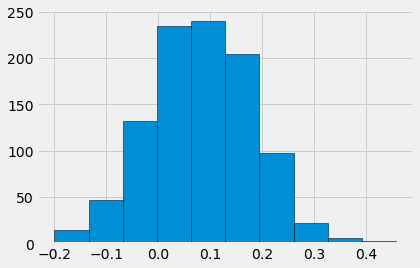

In [187]:
# Calculating 95% CI of the slope of the true line
bootstrap_slope(baby_df,"Maternal Age","Birth Weight",1000)

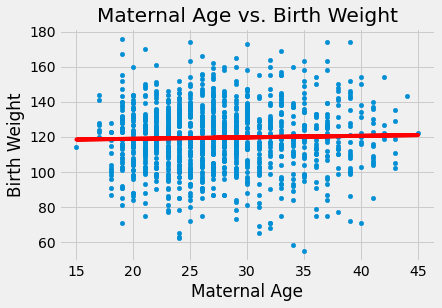

In [188]:
# Calling regression coefficients, m and b, for maternal age and birth weight
reg_age_lbs = reg_coeff(baby_df["Maternal Age"], baby_df["Birth Weight"])

# Plotting maternal age vs. birth weight
baby_df.plot("Maternal Age", "Birth Weight", kind = "scatter")

# Adding fitted line to scatter plot of maternal age vs. birth weight
x = baby_df["Maternal Age"]
y = baby_df["Birth Weight"]
plt.plot(x, reg_age_lbs[0]*x + reg_age_lbs[1], color = "red")
plt.xlabel("Maternal Age")
plt.ylabel("Birth Weight")
plt.title("Maternal Age vs. Birth Weight")
plt.show()

i.) Interpreting the slope of the linear regression. The slope has a very slight positive correlation. The slope was calculated to be 0.085.

ii.) Looking at the real data, maternal age appears to not have a much larger significance
in its affect on birth weight because of how the data points are lined up vertically in the scatter plot. However, the linear regression model does not reflect this beause of the vertical spread in the data. Instead, it shows a linear regression fit with a slopes that is close to 0. Due to the correlation being close to 0 despire the different ages of the mother, this shows that there may be almost no significance of maternal age with baby weights.

iii.) The results show that it makes sense that birth weight is not associated with maternal age. This also makes logical sense because of the vertical spread showing various weights at different ages and limited age range that mothers can carry and deliver a baby.

#### Question 4 (Simple Linear Regression, Maternal Height, 5 points)

Repeat Question 2 for Maternal Height and plot the residuals.


Slope of regression line: 1.478
Approximate 95%-confidence interval for the slope of the true line:
1.045 to 1.924


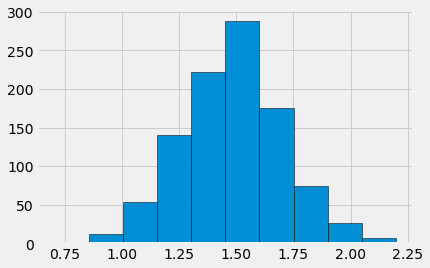

In [218]:
# Calculating 95% CI of the slope of the true line
bootstrap_slope(baby_df,"Maternal Height","Birth Weight",1000)

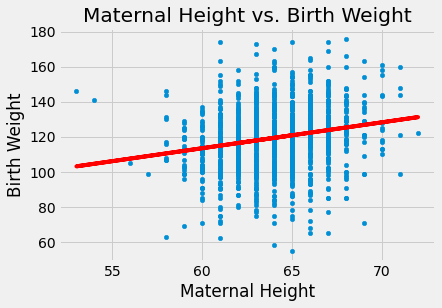

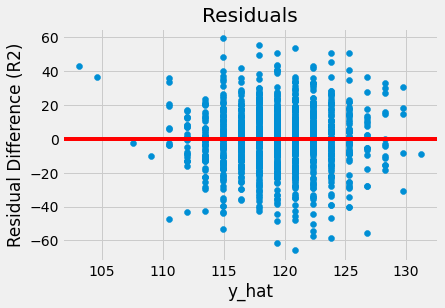

In [219]:
# Calling regression coefficients, m and b, for maternal height and birth weight
reg_h_lbs = reg_coeff(baby_df["Maternal Height"], baby_df["Birth Weight"])

# Plotting maternal height vs. birth weight
baby_df.plot("Maternal Height", "Birth Weight", kind = "scatter")

# Adding fitted line to scatter plot of maternal height vs. birth weight w/ residuals
x = baby_df["Maternal Height"]
y = baby_df["Birth Weight"]
plt.plot(x, reg_h_lbs[0]*x + reg_h_lbs[1], color = "red")
plt.xlabel("Maternal Height")
plt.ylabel("Birth Weight")
plt.title("Maternal Height vs. Birth Weight")
plt.show()

def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

# Set up function for slope of fitted_values function
def slope(x, y):
    """Calculates slope with a given array of x and y values"""
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return  correlation(x, y)* np.std(y,ddof=1)/np.std(x,ddof=1)

# Set up function for intercept of fitted_values function 
def intercept(x, y):
    """Calculates intercept with a given array of x and y values"""
    b1 = slope(x, y)
    return np.average(y) - b1 * np.average(x)

# Functions to find the residuals given an array of numbers x and y
def fitted_values(x, y):
    """Return an array of the regression predictions at all the x values"""
    b1 = slope(x, y)
    b0 = intercept(x, y)
    return b1*x + b0

# Calculates the residuals for every point (x,y)
def residuals(x, y):
    """Calculates the residuals for every point (x,y)"""
    return y - fitted_values(x, y)

# Function to build a residual plot based on yhat and x
def residual_plot(x, y):
    """Creates and plots a residual plot by plotting
    the residuals against the predictor variable"""
    yhat = fitted_values(x, y)
    resid = residuals(x, y)
    plt.scatter(yhat, resid)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel("y_hat")
    plt.ylabel("Residual Difference (R2)")
    plt.title("Residuals")
    plt.show()
    
# Plotting residuals for Maternal Height vs. Birth Weight
residual_plot(baby_df["Maternal Height"], baby_df["Birth Weight"])
    

i.) Interpreting the slope of the linear regression. The slope has a positive correlation. The slope was calculated to be 1.478.

ii.) Looking at the real data, maternal height appears to not have a much larger significance
in its affect on birth weight because of how the data points are lined up vertically in the scatter plot given that height is a discrete variable. However, the linear regression model does not reflect this beause of its positive correlation. This may show that there might be a slight significance of maternal height and birth weight.

iii.) The results show that it may perhaps make sense that maternal height is slightly associated with birth weight. This also makes logical sense because of the idea of taller mothers, which indicate larger body mass, will have the capacity to produce larger babies. This is however not absolute because of how small the range is for for maternal height.

#### Question 5 (Simple Linear Regression, Maternal Smoking, 5 points)

Fit a simple linear regression model with `Maternal Smoker` as the predictor (x variable). You need to create a dummy variable, a numerical variable with values 0 and 1 for that. 

What is the meaning of slope and intercept here?


In [148]:
# code here and in additional cells if needed
# will get graph that looks very weird w/ a best fit
# smoker = pd.get_dummies(baby_df["Maternal Smoker"])[True]
# fit = fitted_values(smoker, baby_df["Birth Weight"])
# smoker, fit

baby_df["smoker"] = pd.get_dummies(baby_df["Maternal Smoker"]).iloc[:,1]

baby_df["smoker_2"] = baby_df['Maternal Smoker'].replace(False,0).replace(True,1)

baby_df.head()

smoker_mean = np.mean(baby_df["smoker"])
smoker2_mean = np.mean(baby_df["smoker_2"])
bw_mean  = np.mean(baby_df["Birth Weight"])

smoker_mean, smoker2_mean, bw_mean

(0.3909710391822828, 0.3909710391822828, 119.46252129471891)

Text(0, 0.5, 'Birth Weight')

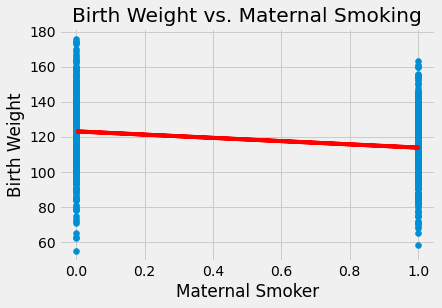

In [220]:
baby_df["smoker"] = pd.get_dummies(baby_df["Maternal Smoker"]).iloc[:,1]
x = baby_df["smoker"]
y = baby_df["Birth Weight"]
coefficients=reg_coeff(x,y)

plt.plot(x,coefficients[0]*x + coefficients[1],color="red")
plt.scatter(x,y)
plt.title('Birth Weight vs. Maternal Smoking')
plt.xlabel('Maternal Smoker')
plt.ylabel('Birth Weight')

In [221]:
baby_df["smoker"] = pd.get_dummies(baby_df["Maternal Smoker"]).iloc[:,1]
x = baby_df["smoker"]
y = baby_df["Birth Weight"]
coefficients=reg_coeff(x,y)
coefficients

(-9.266142572024926, 123.08531468531469)

Slope of regression line: -9.266
Approximate 95%-confidence interval for the slope of the true line:
-11.375 to -7.265


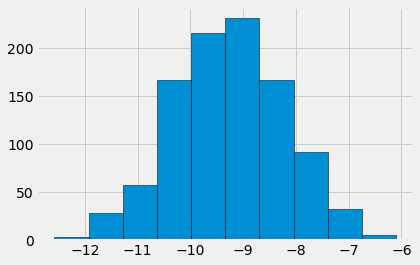

In [191]:
bootstrap_slope(baby_df,"smoker","Birth Weight",1000)

The meaning of the slope and intercept indicate the average difference of weight for babies with mothers that smoked and babies with mothers who did not smoke. With the slope being -9.266, this shows that on average babbies with mothers who smoked tend to weight 9.266 ounces less than babies with mothers who did not smoke. 

#### Question 6 (Multiple Linear Regression, 10 points)

Fit a multiple linear regression with four predictors: Gestational Days, Maternal Smoking, Maternal Height and Maternal Pregagncy Weight. 

To do this, you should probably write a loss function that returns a single value and run scipy.optimize.minimize().  

Here you are required only to find the least square parameters (the value of the parameters that minimize the least squares function). Discuss whether these parameters have changed dramatically from when you fitted simple linear regressions (for the three variables for which you did that above). 

In [226]:
# There are 2 different approaches, the math approach and the optimization approach
# --> How can I organize and distinguish between them?

# SSE is recipe for comparing predictions to observed data, SSE in general will loop over data
# 1. yhat = b0 + b1x1 + b2x2 + b3x3 + b4x4 --> run a sum squared error, compare function to data?
# --> can make yhat functions
# 2. put yhat function into minimize function w/ a guess (vector of numbers within domain of loss function)
# 3. minimize function will return coeff. that match guess?
# 4. plug coeff into loss function and evaluate
# 5. plot the residuals which is observed - predicted, should look symmetric

# Prepare x values --> x1-x4 --> how can we prepare these values? --> we prepare with a vector
# a five-dimensional loss function
# b is a vector
# Returns a vector
# Set up maternal smoking parameter w/ dummy variable --> pull dummy variable from question 5 
def f(b):
    """Returns loss function with 5 predictors"""
    estimate = b[0] + (b[1]*baby_df["Gestational Days"]) + (b[2]*baby_df["Maternal Height"]) + \
                       (b[3]*baby_df["Maternal Pregnancy Weight"]) + (b[4]*baby_df["smoker"])
    return ((np.mean((estimate - baby_df["Birth Weight"])**2))/len(baby_df))


In [229]:
# Minimize takes only one argument --> which is why we pass one vector
# Last line "X" shows the values that make the loss function small
# Can use .x at the end of minimize() to grab only the x values
from scipy.optimize import minimize

baby_min = minimize(f, x0=[0,0,0,0,0]).x
baby_min

array([-7.72502630e+01,  4.37141049e-01,  1.09744048e+00,  5.97769605e-02,
       -8.34924707e+00])

In [230]:
# The predicted weight
baby_pred = baby_min[0]+baby_min[1]*baby_df["Gestational Days"]\
            +baby_min[2]*baby_df["Maternal Height"]\
            +baby_min[3]*baby_df["Maternal Pregnancy Weight"]\
            +baby_min[4]*baby_df["smoker"]
baby_pred

# can plot by histogram, scatter, and compare them to the true data
# how far off are they? did they change dramatically?

0       120.916801
1       124.329593
2       113.473384
3       118.674898
4       121.372644
           ...    
1169    114.787650
1170    119.293862
1171    121.908711
1172    123.495469
1173    131.625488
Length: 1174, dtype: float64

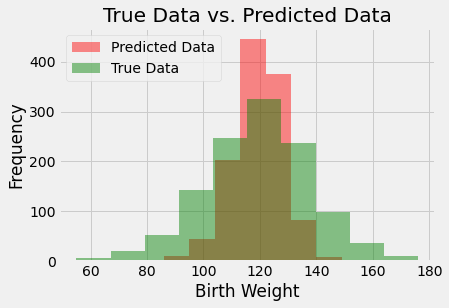

In [234]:
plt.hist(baby_pred, color="red", label="Predicted Data", alpha=0.45)
plt.hist(baby_df["Birth Weight"], label="True Data", color = "green", alpha=0.45)
plt.xlabel('Birth Weight')
plt.ylabel('Frequency')
plt.title("True Data vs. Predicted Data")
plt.legend()

Comparing the values of the parameters of the minimized least squares function and the calculated parameters of the of the slopes of the linear regressions, we see that there are more significant differences in maternal height and maternal smoking and a small difference for gestational days. 

Gestational Days vs. Birth Weight minimized coefficient: 0.44
Gestational Days vs. Birth Weight linear regression slope: 0.47
Maternal Height vs. Birth Weight minimized coefficient: 1.10 
Maternal Height vs. Birth Weight linear regression slope: 1.48
Maternal Smoking vs. Birth Weight minimized coefficients: -8.34 
Maternal Smoking vs. Birth Weight linear regression slope: -9.27

#### Question 7 (Prediction and cross validation, 10 points)

Compare two models to predict birth weight. 

Assess the performance of two models using "leave one out" cross validation, where you fit the predictor on n-1 data and evaluate its accuracy predicting the "held out" data point. 

You should do this for two models: (i) the model in Question 6; (ii) a model of your choice. For the model of your choice, pick something that makes sense to you (you will not be evaluated on whether it predicts better than the model in Question 6).

**For computational convenience, you may do the cross-validation only for a subset of the data, let's say the first 100 subjects.**

**For Question 7 you are allowed to use available regression functions if you find them useful (for computational reasons).**

*Describe your model here, replacing this text.*

In [244]:
# the cross-validation (leave-one-out) predictions w/ model from question 6 (model 1)
n=baby_df.shape[0]

predicted1 = np.array([])
    
for i in range(n):
    # drop the row indexed by i
    tmp_df=baby_df.drop(i)

    #the predicted weight for model 2
    baby_pred = baby_min[0]+baby_min[1]*baby_df["Gestational Days"]\
            +baby_min[2]*baby_df["Maternal Height"]\
            +baby_min[3]*baby_df["Maternal Pregnancy Weight"]\
            +baby_min[4]*baby_df["smoker"]   
    
    # appending the result
    predicted1 = np.append(predicted1, baby_pred)
    
predicted1[0:100]

array([120.91680079, 124.32959328, 113.47338385, 118.67489805,
       121.37264417, 108.09376176, 109.55169975, 124.59693005,
       125.66640196, 157.98543317, 115.32279964, 113.15304386,
       110.09891314, 120.4336456 , 124.24469114, 104.67720877,
       101.81285265, 121.63158679, 121.21651219, 107.7937445 ,
       118.16661768, 129.30794909, 128.90602605, 129.89562586,
       106.52295457, 115.13713643, 112.47460833, 129.20067464,
       114.4987679 , 113.99827043, 119.9462542 , 119.68717603,
       115.08653519, 124.0932383 , 127.76017097, 120.72519044,
       114.93534272, 108.4882543 , 127.34024738, 123.99422094,
       114.83514788, 101.91610623, 109.89135333, 132.66682123,
       112.87845764, 124.18181042, 117.8607438 , 111.34444234,
       118.29202823, 119.54284782, 125.54016483, 120.88546811,
       116.5809592 , 121.41419451, 114.79739234, 114.86979966,
        97.68579537, 114.77170093, 129.22855268, 115.60573499,
        98.40980212, 114.72227717, 115.88224748, 108.39

In [240]:
# setting up model 2

tmp_df=baby_df

# defining and returning my loss function
def mse(b):
    ''' rss(b)
    b[0] offset
    b[1] gestational days coefficient
    b[2] maternal pregnancy weight coefficient
    returns sums squared error for y= b0+(x1*b1)+(x2*b2) where
    x is taken from columns in temp_df'''
    model_estimate = b[0]+b[1]*baby_df["Gestational Days"]\
            +b[2]*baby_df["Maternal Pregnancy Weight"]
    return ((np.mean((model_estimate - baby_df["Birth Weight"])**2))/len(baby_df))

# obtaining my minimized coefficients for parameters
baby_min_mod_2 = minimize(mse,x0=[0,0,0]).x
baby_min_mod_2

array([-26.27267593,   0.46259783,   0.12938724])

In [242]:
# the cross-validation (leave-one-out) predictions w/ fabricated model (model 2) 

n=baby_df.shape[0]

predicted2 = np.array([])
    
for i in range(n):
    # drop the row indexed by i
    tmp_df=baby_df.drop(i)
    
    # the estimated values of the parameters
    tmp_fit = minimize(mse,x0=[0,0,0]).x

    #the predicted weight for model 2
    baby_pred_2 = tmp_fit[0]+tmp_fit[1]*baby_df["Gestational Days"]\
            +tmp_fit[2]*baby_df["Maternal Pregnancy Weight"]   
    
    # appending the result
    predicted2 = np.append(predicted2, baby_pred_2)
    
predicted2[0:100]

array([118.04383163, 121.64718935, 117.67165107, 120.35331696,
       118.06331661, 109.63212313, 105.17800586, 123.59150176,
       129.64073969, 151.625631  , 120.22392972, 119.35368519,
       116.5266509 , 119.94216644, 122.38804664, 107.86317556,
       110.63876254, 116.46118832, 125.32848701, 110.66175134,
       123.1218963 , 125.2540509 , 124.95280263, 125.51632919,
       108.95672842, 116.96976375, 119.42111366, 124.97929525,
       117.558245  , 112.21439821, 121.22005767, 113.61817286,
       114.52738736, 119.24378293, 121.46285098, 117.67165107,
       118.85912503, 110.30905576, 129.97044647, 125.23106209,
       114.02581956, 105.27192695, 114.71172573, 129.1391719 ,
       111.19878528, 119.96165142, 123.74037399, 109.89790524,
       123.7918213 , 118.41250836, 122.33309551, 114.32006019,
       117.76206835, 121.09067043, 110.72917981, 115.02545133,
        95.28261688, 112.43770654, 122.22319326, 119.4281213 ,
       103.88413346, 120.81591479, 119.05944456, 106.93

Both models of the cross validation were able to work accurately in predicting the baby weights with the held out data point. The cross validation models were able to run successfuling in calculated the predicted baby weights.